<a href="https://colab.research.google.com/github/RenneTaggere/VKR_wonderfull_NO_git/blob/main/vkr_rebuilding_o_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
from google.colab import drive #подрубаем гугл диск. иначе ссылки не будут работать
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Для поддержки как Python 2, так и Python 3 ¯\_(ツ)_/¯
from __future__ import division, print_function, unicode_literals

from sklearn import set_config
set_config(display='diagram')   

# Импорт стандартных библиотек

import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import scipy
from math import sqrt
import os

# Импорт изварщенского Scikit-Learn, главное услвоие импорта это вера

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Импорт TemsorFlow и его Keras для того что б делать нейроночки

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Путь сохранния графиков  и диаграмм
#PROJECT_ROOT_DIR = "."
#IMAGES_PATH = "Изображения_проекта_ВКР"
#os.makedirs(IMAGES_PATH, exist_ok=True)
#
#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#    print("Сохранены изображения", fig_id)
#    if tight_layout:
#        plt.tight_layout()
#    plt.savefig(path, format=fig_extension, dpi=resolution)
#    
%matplotlib inline

In [3]:
#DF = pd.read_excel('/content/DATA/X_nup.xlsx', sheet_name='X_nup.csv')
#DF
## загружаем файлы из папки DATA для нормального локального проекта
#df1 = pd.read_excel('./DATA/X_bp.xlsx') 
#df2 = pd.read_excel('./DATA/X_nup.xlsx')
#/content/drive/MyDrive/Colab Notebooks/DATA/X_bp.xlsx если вдруг я захочу юзать папку DATA c гугл диска
#

# Загрузка датасетов

In [4]:
ogrizok1_bp = pd.read_excel('/content/drive/MyDrive/DATA/X_bp.xlsx', sheet_name='X_bp.csv') #адрес ссылки для курильщика гугл_драйв
#ogrizok1_bp = pd.read_excel('./DATA/X_bp.xlsx') адрес для здорового человека



In [5]:
ogrizok1_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [6]:
ogrizok2_nup = pd.read_excel('/content/drive/MyDrive/DATA/X_nup.xlsx', sheet_name='X_nup.csv') 
#адрес ссылки для курильщика гугл_драйв
#ogrizok2_nup = pd.read_excel('./DATA/X_nup.xlsx', sheet_name='X_nup.csv') #адрес для здорового человека

In [7]:
ogrizok2_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.000000,57.000000
1,1,0,4.000000,60.000000
2,2,0,4.000000,70.000000
3,3,0,5.000000,47.000000
4,4,0,5.000000,57.000000
...,...,...,...,...
1035,1035,90,8.088111,47.759177
1036,1036,90,7.619138,66.931932
1037,1037,90,9.800926,72.858286
1038,1038,90,10.079859,65.519479


In [8]:
# Объеденяем два этих зачем-то распиленных экзелевских фаила методом конкатенации. 
#Объединение делать по индексу тип объединения INNER (в соответствии с заданием) 
#и даже плевать что это значение атрибута join нельзя писать КАПСОМ. (－‸ლ)

#
df = pd.concat([ogrizok1_bp, ogrizok2_nup], join="inner", axis=1, ignore_index=False)
#смотрим что получилось
df
# есть задублированный столбец повторяющий по сути индекс строк. "Unnamed: 0" Притом два раза. 
#Надо его удалить: ибо лишний!

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,1,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,2,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,3,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,4,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1018,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1019,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1020,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1021,90,6.313201,58.261074


# Предобработка данных

In [9]:
# Удаляем(дропаем) эти лишние "индексные" столбцы по названию "Unnamed: 0"(т.к. мусор это ненужный) 


df = df.drop(columns=['Unnamed: 0'], axis =1)


In [10]:
#смотрим что у нас  получилось, любуемся, восторгаемся своими скилом.
df




,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [11]:
# Можем отстортировать столбцы в порядке, удобном кому-нить для манипулирования
# Поскольку датасет априори кривой и неудобный, а вот эта сортировка это лишняя и ненужная работа поэтому я не буду ее делать, 
#закккоментю ее для последущих поколений и сохранения хода мыслей того кто изначально (нефакт, конечно что изначально, но точно до меня придумывал этот код) 
#composites_headers = ['Соотношение матрица-наполнитель',         # [0]
#                     'Плотность, кг/м3',                        # [1]
#                      'модуль упругости, ГПа',                   # [2]
#                      'Количество отвердителя, м.%',             # [3]
#                      'Содержание эпоксидных групп,%_2',         # [4]
#                      'Температура вспышки, С_2',                # [5]
#                      'Поверхностная плотность, г/м2',           # [6]
#                      'Потребление смолы, г/м2',                 # [7]
#                      'Шаг нашивки',                             # [8]
#                      'Плотность нашивки',                       # [9]
#                      'Угол нашивки, град',                      # [10]
#                      'Модуль упругости при растяжении, ГПа',    # [11]
#                      'Прочность при растяжении, МПа']           # [12]
#
#composites = composites[composites_headers]

## Основные характеристики датасета

In [13]:
# Основные статистические характеристики атрибутов, мне здесь нечего добавить: рандомный набор, рандомных значений

df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [14]:
# Коэффициенты кореляции атрибутов
# Более интересная портянка цифр, т.к. здесь показаны зависмость между значениями
# гуру с курса которого прошел я утверждают, что поглядев на эту матрицу не очень связанных цифр можно решить чего и как делать дальше
#а именно какую из сложных мат. моделий приминить для попыток поиска зависимостей
# на самом деле. Мы все взрослые люди и не будет заниматься окультизмом и несмешным standUPом 
# рандом пробуем все значения, молимся что б повезло

df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [15]:
df.info() # еще очень важная и неочевидная инфа


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [16]:
# Посмотрим кол-во уникальных значений
df.nunique() 
#ясности это не внесло

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

## Основные графические изображения характеристик

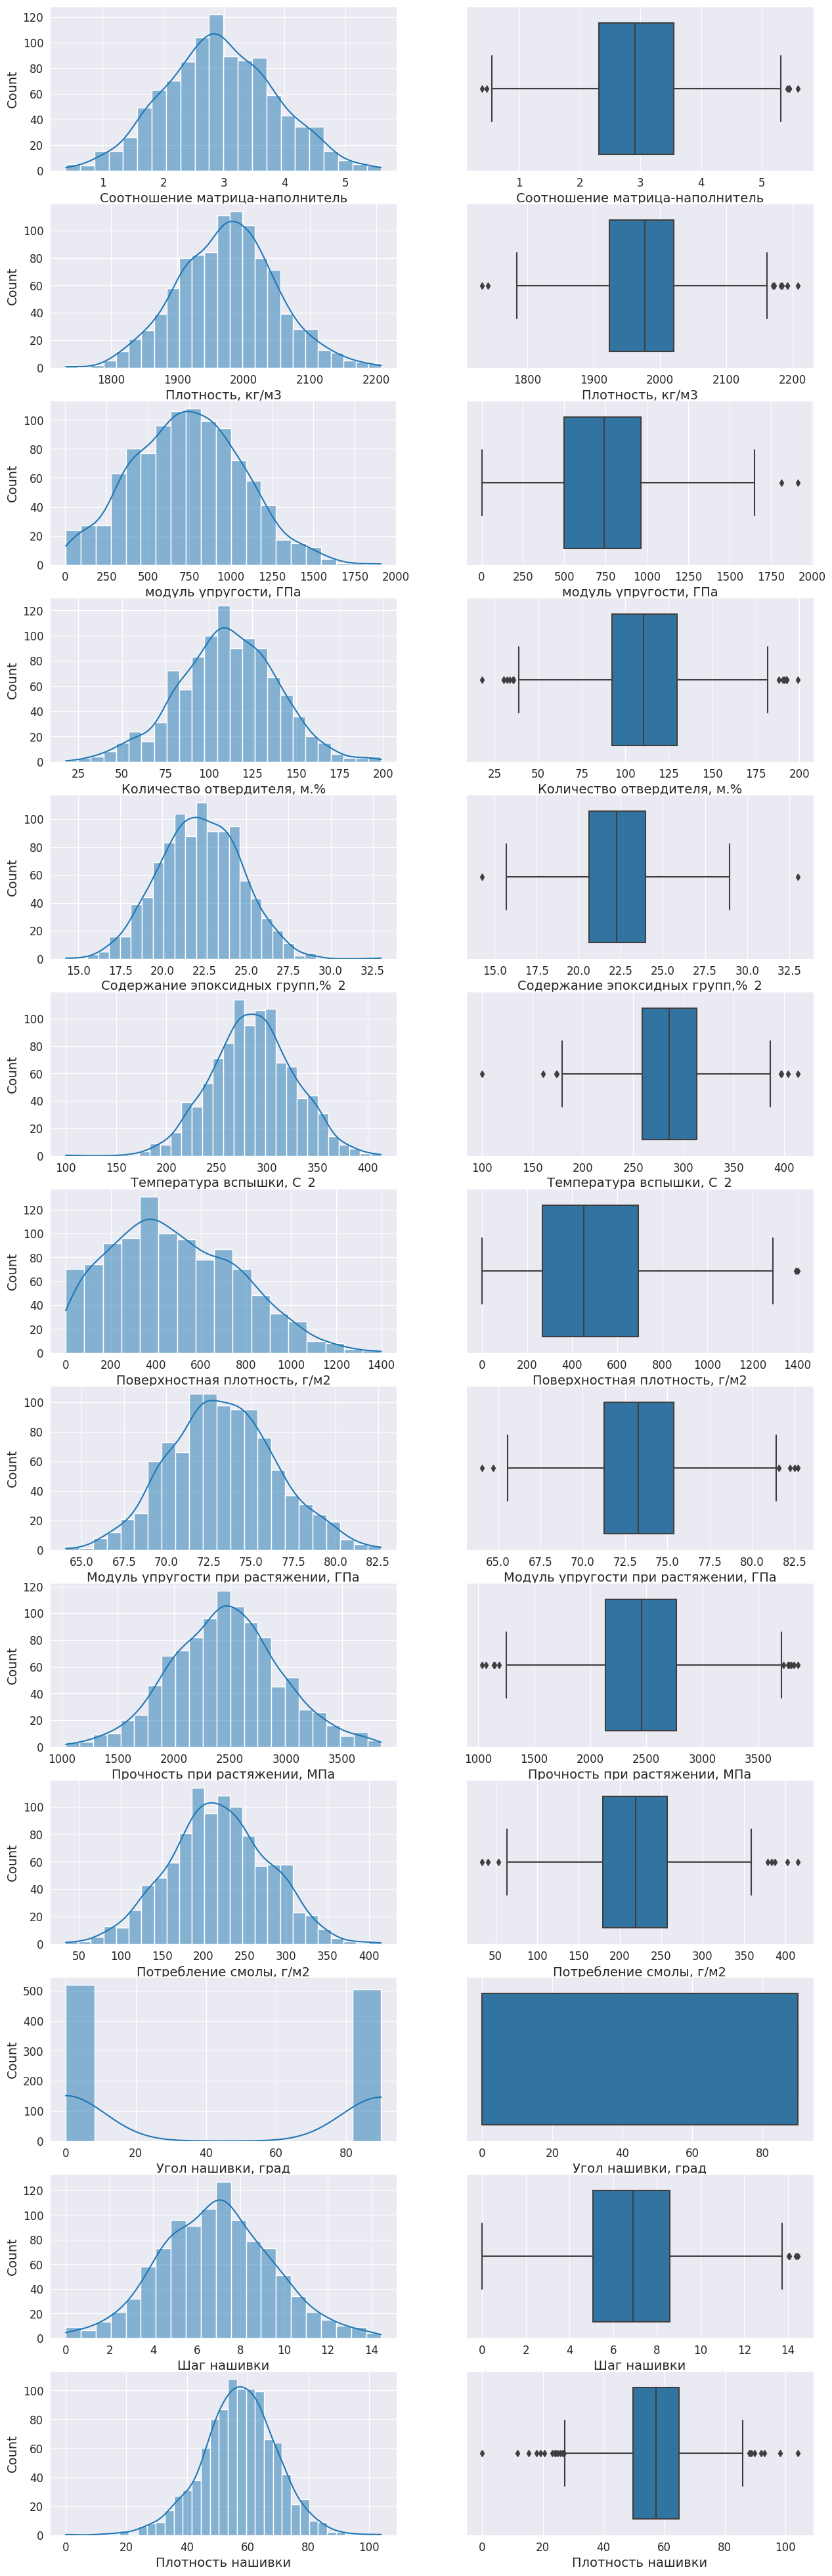

In [17]:
# что бы показать что мы Дата СаинтИсты, и я в частности, сделаем вид что 
#изучаем и понимаемкучу диаграм. А главное что они помогают нам в выоборе  
#сложной мат модели для предсказаний из пунктов выше
# Гистограммы распределения и ящики с усами
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df, x=column, ax=axes[i, 1])
plt.show()

In [18]:
# Исходя из графиков, переменная "Угол нашивки, град" является категориальной,
# а значит лишней, ящики с усами врать не будут! буд-то мы не поняли это
# после инфы об уник значениях XD мы ж и$$ледователи)))) 
# кароч, дропаем коломну 'Угол нашивки, град'

#df = df.drop(columns=['Угол нашивки, град'], axis =1)

In [19]:
#смотрим теперь че да как
#df

## Нормализация по минимаксу

In [20]:
minmax_scaler = MinMaxScaler()
df_norm = minmax_scaler.fit_transform(df)
df_norm = pd.DataFrame(data = df_norm, columns = df.columns)
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262


## Стандартная нормализация

In [21]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df)
df_std = pd.DataFrame(data = df_std, columns = df.columns)
df_std

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.969964,-1.067720,1.098244,0.026410,-0.983518,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.969964,-1.067720,1.098244,0.026410,-0.983518,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.969964,-1.067720,1.098244,0.026410,-0.983518,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.969964,-1.067720,1.098244,0.026410,-0.983518,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.969964,-1.067720,1.098244,0.026410,-0.983518,-0.741243,-0.012469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.972814,-0.076219,-0.164054,-1.564572,1.016758,0.849718,-0.820917
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.469707,-0.130794,-0.219473,-1.686461,1.016758,1.430947,-0.275671
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.915476,0.450935,0.403764,0.304549,1.016758,-1.068634,0.848588
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.564542,0.229077,-0.814204,-0.356695,1.016758,-0.228717,0.089684


## Графические изображения характеристик нормализованных атрибутов

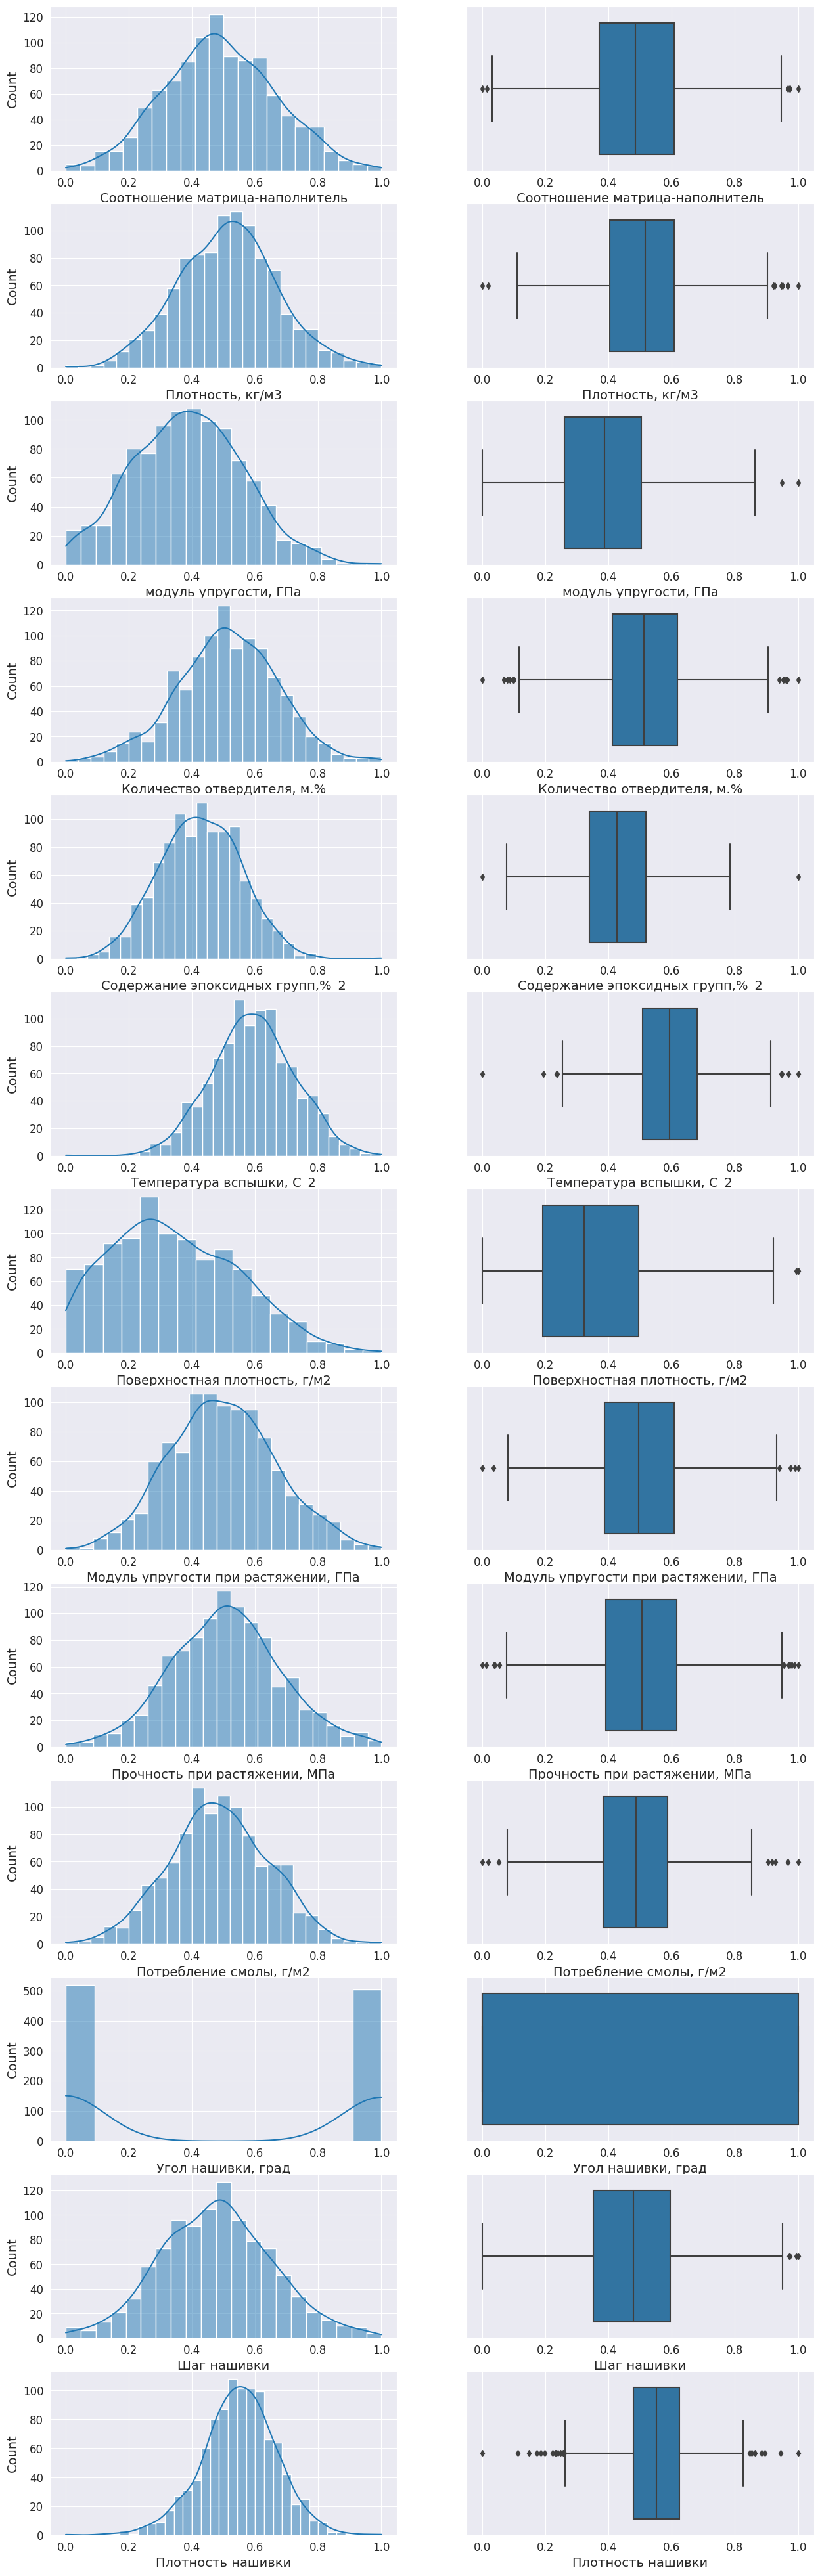

In [25]:
#df_norm.hist(bins=50, figsize=(20,15))

#plt.show()
#df_std.hist(bins=50, figsize=(20,15))

#plt.show()


fig, axes = plt.subplots(13, 2, figsize=(15, 50))
for i, column in enumerate(df.columns):    
    sns.histplot(data=df_norm, x=column, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df_norm, x=column, ax=axes[i, 1])
plt.show()

In [ ]:
# Графики рассеивания
#sns.pairplot(composites_norm, height=7)
#save_fig("Совместные диаграммы рассеивания после нормализации по минимаксу")
#sns.pairplot(composites_std, height=7)
#save_fig("Совместные диаграммы рассеивания после стандартной нормализации")

Вывод ящиков с усами

In [ ]:
# Для нормализации по минимаксу
plt.figure(figsize=(13, 9))
boxplot_norm = plt.boxplot(composites_norm, notch=None, vert=None, patch_artist=None, widths=None)
size = plt.gca()
size.set_xlim(0.5, len(composites_norm.columns) + 0.5)
size.set_xticklabels(composites_headers,
                      rotation=90, fontsize=7)
save_fig("Ящиковые диаграммы для минмакс нормализации")
plt.show()

In [ ]:
# Для стандартной нормализации
plt.figure(figsize=(13, 9))
boxplot_std = plt.boxplot(composites_std, notch=None, vert=None, patch_artist=None, widths=None)
size = plt.gca()
size.set_xlim(0.5, len(composites_std.columns) + 0.5)
size.set_xticklabels(composites_headers,
                      rotation=90, fontsize=7)
save_fig("Ящиковые диаграммы для стандартной нормализации")
plt.show()

## Делим датасет на тренировочные и целевые значения

In [ ]:
# Признак 'Угол нашивки' приводим к значениям 0 и 1
cleanup_angle = {composites_norm.columns[10]: {0: 0, 90: 1}}
composites_norm = composites_norm.replace(cleanup_angle)
composites_norm.values[:,10]

In [ ]:
X_composites, y_composites = composites_norm.values[:, :-2], composites_norm.values[:, -2:]

In [ ]:
X_composites, y_composites

## Разбиваем на обучающую и тестовую выборки

In [ ]:
X_composites_train, X_composites_test, y_composites_train, y_composites_test = \
                                    train_test_split(X_composites, y_composites, test_size = 0.3
                                                     , random_state = 42, shuffle = True)

In [ ]:
print (X_composites_train.shape)
print (X_composites_test.shape)
print (y_composites_train.shape)
print (y_composites_test.shape)

In [ ]:
# Возвращаем заголовки для датафрейма

X_composites_train = pd.DataFrame(X_composites_train, columns=composites_headers[:-2])
y_composites_train = pd.DataFrame(y_composites_train, columns=composites_headers[-2:])
X_composites_test = pd.DataFrame(X_composites_test, columns=composites_headers[:-2])
y_composites_test = pd.DataFrame(y_composites_test, columns=composites_headers[-2:])

In [ ]:
print (X_composites_train.shape)
print (X_composites_test.shape)
print (y_composites_train.shape)
print (y_composites_test.shape)

# Работа с моделями

## Линейная регрессия

In [ ]:
# Поиск по сетке
param_grid = [
    {'fit_intercept': [True, False]},
             ]
lin_reg = LinearRegression()

grid_search = GridSearchCV(lin_reg, param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, lin_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, lin_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, lin_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, lin_reg.predict(X_composites_test)))

## Полномиальная регрессия

In [ ]:
def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Поиск по сетке
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'linearregression__fit_intercept': [True, False]}
grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное

polyreg = PolynomialRegression(degree = 1, fit_intercept = True)
polyreg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, polyreg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, polyreg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, polyreg.predict(X_composites_test))))
print(r2_score(y_composites_test, polyreg.predict(X_composites_test)))

## Лассо регрессия

In [ ]:
# Поиск по сетке
param_grid = [
    {'alpha': [0.1, 0.2, 0.3], 'selection': ['cyclic', 'random']},
             ]
lasso_reg = Lasso(alpha=0.1)

grid_search = GridSearchCV(lasso_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
lasso_reg = Lasso(alpha = 0.3, selection = 'random')

lasso_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, lasso_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, lasso_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, lasso_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, lasso_reg.predict(X_composites_test)))

In [ ]:
# Проверяем с другими параметрами
lasso_reg = Lasso(alpha = 0.1, selection = 'cyclic')

lasso_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, lasso_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, lasso_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, lasso_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, lasso_reg.predict(X_composites_test)))

## Эластичная сеть

In [ ]:
# Поиск по сетке
param_grid = [
    {'alpha': [0.1, 1], 'l1_ratio': [0.3, 0.5, 0.9], 'selection': ['cyclic', 'random']},
             ]
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.3, selection = 'cyclic')

elastic_net.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, elastic_net.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, elastic_net.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, elastic_net.predict(X_composites_test))))
print(r2_score(y_composites_test, elastic_net.predict(X_composites_test)))

In [ ]:
# Проверяем с другими параметрами
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.1, selection = 'random')

elastic_net.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, elastic_net.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, elastic_net.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, elastic_net.predict(X_composites_test))))
print(r2_score(y_composites_test, elastic_net.predict(X_composites_test)))

## Метод опорных векторов

In [ ]:
# Поиск по сетке
param_grid = [
    {'estimator__kernel': ['rbf', 'sigmoid'], 'estimator__C': [1., 50., 100.],
     'estimator__epsilon': [0.1, 0.5, 0.9]},
             ]
svm_poly_reg = MultiOutputRegressor(SVR())

grid_search = GridSearchCV(svm_poly_reg, param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
svm_poly_reg = MultiOutputRegressor(SVR(C = 1, epsilon = 0.5, kernel = 'rbf'))

svm_poly_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, svm_poly_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, svm_poly_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, svm_poly_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, svm_poly_reg.predict(X_composites_test)))

In [ ]:
# Для проверки, с другими параметрами
svm_poly_reg = MultiOutputRegressor(SVR(C = 100.0, epsilon = 0.5, kernel = 'poly'))

svm_poly_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, svm_poly_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, svm_poly_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, svm_poly_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, svm_poly_reg.predict(X_composites_test)))

## Дерево принятия решений

In [ ]:
# Поиск по сетке
param_grid = [
    {'random_state': [0, 1, 2], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3]},
             ]
dectree_reg = DecisionTreeRegressor(random_state = 0)

grid_search = GridSearchCV(dectree_reg, param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)
#
print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
dectree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 2, splitter = 'random')

dectree_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, dectree_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, dectree_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, dectree_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, dectree_reg.predict(X_composites_test)))

In [ ]:
# Проверяем с другими параметрами
dectree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 0, splitter = 'best')

dectree_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, dectree_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, dectree_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, dectree_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, dectree_reg.predict(X_composites_test)))

## Беггинг

In [ ]:
# Поиск по сетке
param_grid = [
    {'bootstrap': [True], 'n_estimators': [3, 10, 30], 'max_samples': [3, 9, 30, 100]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30]},
             ]
bag_reg = BaggingRegressor(n_jobs = -1)

grid_search = GridSearchCV(bag_reg, param_grid, cv = 2, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
bag_reg = BaggingRegressor(
            bootstrap = True, max_samples = 9, n_estimators = 30,
            n_jobs = -1, warm_start = False)

bag_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, bag_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, bag_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, bag_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, bag_reg.predict(X_composites_test)))

In [ ]:
# Для проверки, с другими параметрами
bag_reg = BaggingRegressor(
            bootstrap = True, max_samples = 3, n_estimators = 30,
            n_jobs = -1, warm_start = False)

bag_reg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, bag_reg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, bag_reg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, bag_reg.predict(X_composites_test))))
print(r2_score(y_composites_test, bag_reg.predict(X_composites_test)))

## Случайный лес

In [ ]:
# Поиск по сетке
param_grid = [
    {'n_estimators': [3, 10, 30], 'random_state': [0, 1], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(X_composites_train, y_composites_train)

print(grid_search.best_params_)
print(sqrt(abs(grid_search.best_score_)))

In [ ]:
# Подставляем рекомендованное
randforreg = RandomForestRegressor(max_features = 2, n_estimators = 30, random_state = 0)

randforreg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, randforreg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, randforreg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, randforreg.predict(X_composites_test))))
print(r2_score(y_composites_test, randforreg.predict(X_composites_test)))

In [ ]:
# Для проверки, с другими параметрами
randforreg = RandomForestRegressor(max_features = 3, n_estimators = 10, random_state = 1)

randforreg.fit(X_composites_train, y_composites_train)

print(mean_absolute_error(y_composites_test, randforreg.predict(X_composites_test)))
print(mean_squared_error(y_composites_test, randforreg.predict(X_composites_test)))
print(sqrt(mean_squared_error(y_composites_test, randforreg.predict(X_composites_test))))
print(r2_score(y_composites_test, randforreg.predict(X_composites_test)))

# Нейронная сеть для прогноза матрица-наполнитель

## Определяем X y


In [ ]:
y_ns_n = np.array(composites['Соотношение матрица-наполнитель'])
X_ns_n = np.array(composites.drop(['Соотношение матрица-наполнитель'], axis = 1))

## Нормализация по минимаксу

In [ ]:
minmax_scaler_y_ns = MinMaxScaler()
minmax_scaler_X_ns = MinMaxScaler()
y_ns_n = y_ns_n.reshape(-1, 1)
y_ns = minmax_scaler_y_ns.fit_transform(y_ns_n)
X_ns = minmax_scaler_X_ns.fit_transform(X_ns_n)

#сохраняем коэффициенты нормализации
joblib.dump(minmax_scaler_y_ns, 'y_ns.mms') 
joblib.dump(minmax_scaler_X_ns, 'X_ns.mms')
#проверяем
minmax_scaler_y_ns = joblib.load('y_ns.mms')

## Делим на обучающую и тестовую выборки

In [ ]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size=0.3, random_state = 42)

print(X_train_ns.shape)
print(X_test_ns.shape)
print(y_train_ns.shape)
print(y_test_ns.shape)

## Архитектура модели и компиляция

In [ ]:
model_ns = Sequential()
model_ns.add(Dense(128, input_shape = (X_train_ns.shape[1], ), activation = 'relu'))
model_ns.add(Dense(128, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(64, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(32, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(16, activation='relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(1, activation = 'sigmoid'))

#компиляция
model_ns.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse'])

## Обучение модели

In [ ]:
history = model_ns.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 100, 
                        verbose = 1 
                      )

## Оценка ошибки модели

In [ ]:
print(sqrt(mean_squared_error(y_test_ns, model_ns.predict(X_test_ns))))


## Сохраняем модель

In [ ]:
model_ns.save('model_ns.h5')